In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedKFold
from tabulate import tabulate

from package import gpr
from package import rf
from package import io
from package import testhelper as th

In [2]:
# Test Description: training GPR and RF models from 'alldata' (70% train 30% test) and plotting
# residual/y_std vs error/y_std for test data for both models
def test1():
    data = io.importdata('data/_haijinlogfeaturesnobarrier_alldata.csv')
    data = io.sanitizedata(data)
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.3)
    GPR = gpr.GPR()
    GPR.train(X_train, y_train)
    res, sigma = GPR.getgprmetrics(X_test, y_test)
    th.GPR_plot(res, sigma, "GPR", 8)
    RF = rf.RF()
    RF.train(X_train, y_train)
    res, sigma = RF.getrfmetrics(X_test, y_test)
    th.RF_plot(res, sigma, "RF", 8)

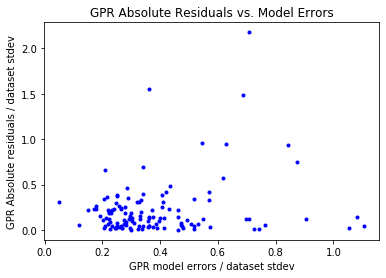

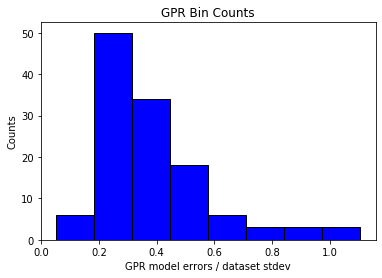

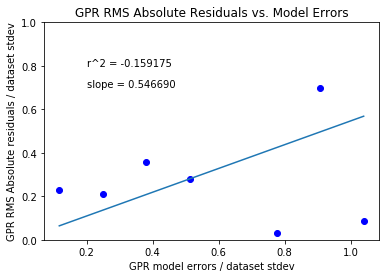

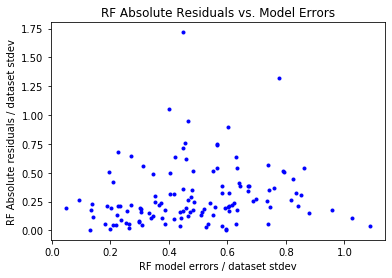

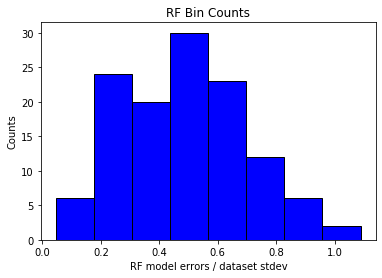

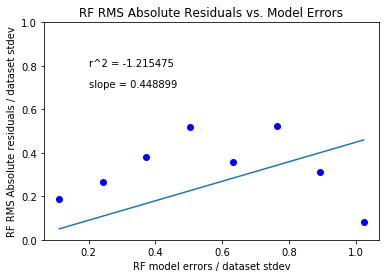

In [3]:
test1()

In [4]:
# Test for getting plots using cross validation

def test3(k, n):
    data = io.importdata('data/_haijinlogfeaturesnobarrier_alldata.csv')
    data = io.sanitizedata(data)
    X_CV = data.iloc[:, :-1]
    Y_CV = data.iloc[:, -1]

    # rf_res = np.array((0, 100))
    rf_res = np.asarray([])
    rf_sigma = np.asarray([])
    gpr_res = np.asarray([])
    gpr_sigma = np.asarray([])

    # This will do repeated cross validation with the given k splits and n repeats
    rkf = RepeatedKFold(n_splits=k, n_repeats=n, random_state=2652124)
    for train_index, test_index in rkf.split(data):
        X_train, X_test = X_CV.iloc[train_index], X_CV.iloc[test_index]
        y_train, y_test = Y_CV.iloc[train_index], Y_CV.iloc[test_index]
        GPR = gpr.GPR()
        GPR.train(X_train, y_train)
        res, sigma = GPR.getgprmetrics(X_test, y_test)
        gpr_res = np.concatenate((gpr_res, res), axis=None)
        gpr_sigma = np.concatenate((gpr_sigma, sigma), axis=None)
        RF = rf.RF()
        RF.train(X_train, y_train)
        res, sigma = RF.getrfmetrics(X_test, y_test)
        rf_res = np.concatenate((rf_res, res), axis=None)
        rf_sigma = np.concatenate((rf_sigma, sigma), axis=None)

    th.GPR_plot(gpr_res, gpr_sigma, "GPR", 20)
    th.RF_plot(rf_res, rf_sigma, "RF", 20)

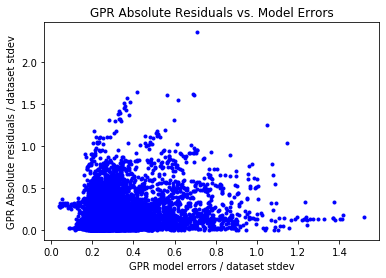

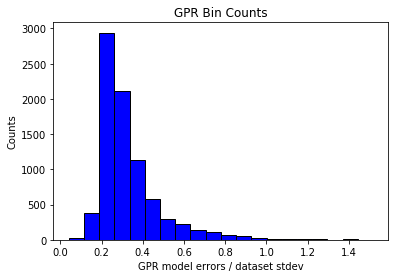

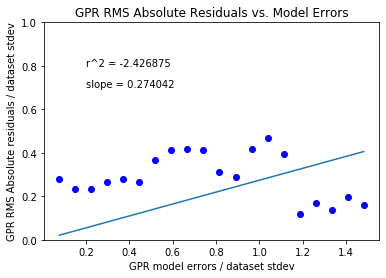

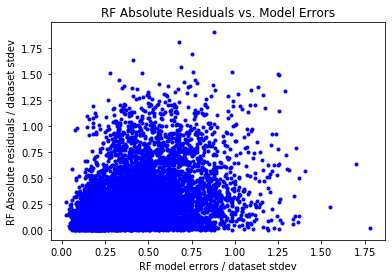

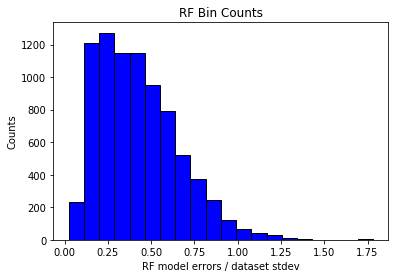

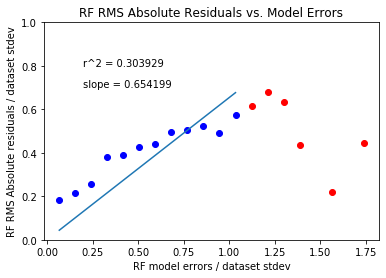

In [5]:
test3(5,20)

In [6]:
# Test Description: training GPR and RF models from 'alldata' or 'alldata_no_Pd', making predictions for 'Pd_only' and
# tabulating domain IN/OUT
def test2():
    data = io.importdata('data/_haijinlogfeaturesnobarrier_alldata_no_Pd.csv')
    data = io.sanitizedata(data)
    X_train = data.iloc[:, :-1]
    y_train = data.iloc[:, -1]
    GPR = gpr.GPR()
    GPR.train(X_train, y_train)
    test_data = io.importdata('data/_haijinlogfeatures_Pd_only.csv')
    final_list = [i + "-" + j for i, j in zip(test_data['Material compositions 1'].values,
                                              test_data['Material compositions 2'].values)]
    test_data = io.sanitizedata(test_data)
    # Define GPR and RF errors
    pred, GPR_errors = GPR.predict(test_data, True)
    RF = rf.RF()
    RF.train(X_train, y_train)
    pred, RF_errors = RF.predict(test_data, True)
    RF_errors = 0.65*RF_errors
    # print(final_list)
    predictions = [th.predictdomain(GPR_errors[i], RF_errors[i]) for i in range(0, len(test_data))]
    results = [(final_list[i], predictions[i], GPR_errors[i], RF_errors[i]) for i in range(0, len(test_data))]
    print(tabulate(results, headers=["Material", "In domain?", "GPR predicted error", "0.65*RF predicted error"]))

In [7]:
test2()

Material      In domain?    GPR predicted error    0.65*RF predicted error
----------  ------------  ---------------------  -------------------------
Pd-H                   0               1.29822                    0.172892
Pd-He                  0               1.29962                    0.376989
Pd-Li                  0               1.16682                    0.102221
Pd-Be                  0               0.814276                   0.332538
Pd-B                   0               0.9582                     0.43499
Pd-C                   0               1.24181                    0.487569
Pd-N                   0               1.01503                    0.454347
Pd-O                   0               1.17745                    0.4435
Pd-F                   0               1.18635                    0.309661
Pd-Ne                  0               1.2068                     0.325457
Pd-Li                  0               1.16682                    0.102221
Pd-Na                  0    